In [22]:
#簡單線性回歸 y =w*x+b
import pandas as pd
#url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
#data = pd.read_csv(url) 網路下載
data = pd.read_csv('Salary_Data.csv') #在相同資料夾

x = data['YearsExperience']
y = data['Salary']

In [23]:

y_pred = w * x + b
cost = (y - y_pred)**2 #真實數據-預測值的平方
cost.sum() / len(x) #距離平方的平均

246639.20242424245

In [24]:
def compute_cost(x ,y ,w ,b): #寫成函數
    y_pred = w * x + b
    cost = (y - y_pred)**2 #真實數據-預測值的平方
    cost = cost.sum() / len(x) #距離平方的平均
    return cost

In [25]:
compute_cost(x,y,10,0)

602.547878787879

In [26]:
#b = 0 w=-100~100 cost=?
costs = [] #建一個LIST存放W-100~100的結果
for w in range(-100,101):
    cost = compute_cost(x,y,w,0)#cost = 每一次結果
    costs.append(cost)#將結果加入CSOTS
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

TypeError: 'str' object is not callable

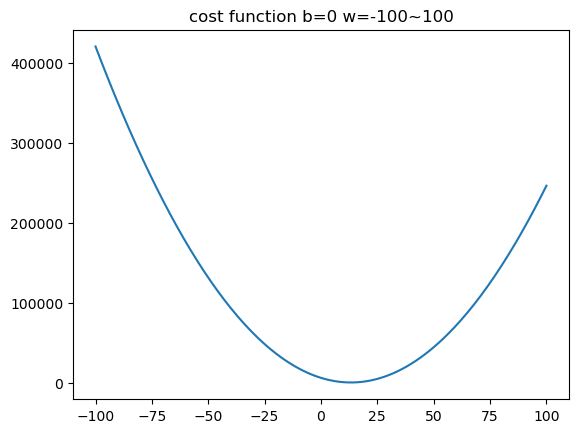

In [31]:
import matplotlib.pyplot as plt
#plt.scatter(range(-100,101),costs) #劃出W跟對應的COSTS的點
plt.plot(range(-100,101),costs) #劃出拋物線
plt.title('cost function b=0 w=-100~100')
plt.xlabel('w')#不確定錯誤原因
plt.ylabel('cost')
plt.show()

In [34]:
# w & b =-100~100 的COST
import numpy as np #矩陣運算

ws = np.arange(-100,101) #w的範圍
bs = np.arange(-100,101) #B的範圍
costs = np.zeros((201,201)) #創建都是0的矩陣，範圍為201-201 來存放所有W跟B的值

i = 0
for w in ws:
    j = 0
    for b in bs:
        cost = compute_cost(x ,y ,w ,b)
        costs[i,j] = cost #相對應的W跟B存放
        j = j + 1 #加一進行存放下一組W跟B
    i = i + 1
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

當w=[9],b=[29]時，會有最小COST:[32.69484848]


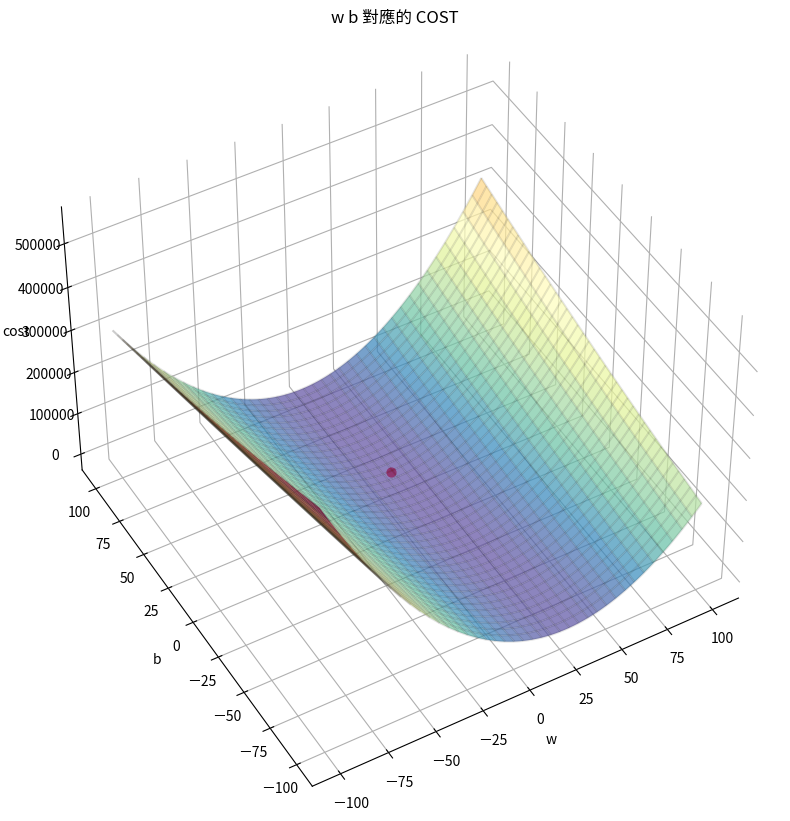

In [51]:
import matplotlib as mpl #字體
from matplotlib.font_manager import fontManager
fontManager.addfont('ChineseFont.ttf') #新增字體
mpl.rc('font',family='ChineseFont') #使用字體

plt.figure(figsize=(10,10))#調整圖大小
ax = plt.axes(projection='3d') #創建3D圖
ax.view_init(45,-120)#圖的旋轉角度
ax.xaxis.set_pane_color((1,1,1)) #X面的顏色設定為白，設定為0的話有時候會跑出全黑
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))

b_grid, w_grid = np.meshgrid(bs,ws)#將WS跟BS轉換成二維網格才能變成3D輸出
ax.plot_surface(w_grid,b_grid,costs,cmap='Spectral_r',alpha=0.7) #cmap設定顏色 alpha不透明度
ax.plot_wireframe(w_grid,b_grid,costs,color='black',alpha=0.1) #設定網格邊框顏色
ax.set_title('w b 對應的 COST') #抬頭標籤
ax.set_xlabel('w') 
ax.set_ylabel('b')
ax.set_zlabel('cost')

w_index,b_index = np.where(costs == np.min(costs)) #np.where找出符合的COSTS的值  np.min最小值 因為會回傳兩個值故設w&b_index
#w_index,b_index 是COSTS裡面的位置值
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color = 'red', s = 40) #劃出最低點 s為大小
plt.show
print(f'當w={ws[w_index]},b={bs[b_index]}時，會有最小COST:{costs[w_index,b_index]}')
#利用index找出ws&bs&cost的值